In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import src.python.yalefaces as yalefaces

In [13]:
X, y = yalefaces.load("../datasets/yalefaces", flatten=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11, stratify=y)

In [14]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(28, 5, activation="tanh", strides=1, padding="same", input_shape=[243, 320, 1]))
model.add(tf.keras.layers.AveragePooling2D((14, 2), strides=2))
model.add(tf.keras.layers.Conv2D(10, 5, activation="tanh", strides=1, padding="same"))
model.add(tf.keras.layers.AveragePooling2D((5, 2), strides=2))
model.add(tf.keras.layers.Conv2D(1, 5, activation="tanh", strides=1, padding="same"))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(15, activation="softmax"))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 243, 320, 28)      728       
                                                                 
 average_pooling2d_8 (Averag  (None, 115, 160, 28)     0         
 ePooling2D)                                                     
                                                                 
 conv2d_13 (Conv2D)          (None, 115, 160, 10)      7010      
                                                                 
 average_pooling2d_9 (Averag  (None, 56, 80, 10)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_14 (Conv2D)          (None, 56, 80, 1)         251       
                                                                 
 flatten_4 (Flatten)         (None, 4480)             

In [15]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_test, y_test))

Epoch 1/30
5/5 [==============================] - 5s 997ms/step - loss: 4.5345 - accuracy: 0.0758 - val_loss: 4.0541 - val_accuracy: 0.0606
Epoch 2/30
5/5 [==============================] - 5s 951ms/step - loss: 3.8914 - accuracy: 0.0758 - val_loss: 2.7144 - val_accuracy: 0.0909
Epoch 3/30
5/5 [==============================] - 5s 976ms/step - loss: 2.7102 - accuracy: 0.1894 - val_loss: 2.8051 - val_accuracy: 0.1515
Epoch 4/30
5/5 [==============================] - 5s 966ms/step - loss: 2.3779 - accuracy: 0.3030 - val_loss: 2.7349 - val_accuracy: 0.0606
Epoch 5/30
5/5 [==============================] - 5s 956ms/step - loss: 2.3275 - accuracy: 0.4015 - val_loss: 1.9369 - val_accuracy: 0.5152
Epoch 6/30
5/5 [==============================] - 5s 957ms/step - loss: 1.4961 - accuracy: 0.5758 - val_loss: 1.5974 - val_accuracy: 0.4545
Epoch 7/30
5/5 [==============================] - 5s 963ms/step - loss: 1.0842 - accuracy: 0.7576 - val_loss: 1.1854 - val_accuracy: 0.6970
Epoch 8/30
5/5 [====

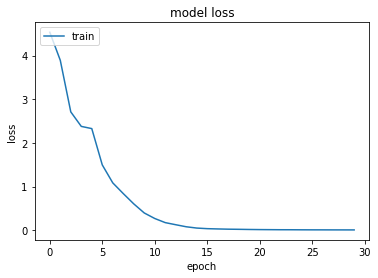

In [16]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

2/2 - 0s - loss: 0.4361 - accuracy: 0.8788 - 318ms/epoch - 159ms/step


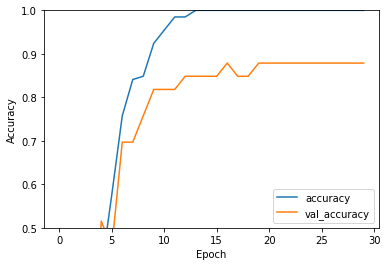

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

In [18]:
model.save('./lenet5')

INFO:tensorflow:Assets written to: ./lenet5\assets


INFO:tensorflow:Assets written to: ./lenet5\assets
